In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [15]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [17]:
df['Outcome'].value_counts(normalize=True) * 100 

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

In [19]:
cols_with_invalid_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_invalid_zero:
    print(f"{col} has {(df[col] == 0).sum()} zero values")

Glucose has 5 zero values
BloodPressure has 35 zero values
SkinThickness has 227 zero values
Insulin has 374 zero values
BMI has 11 zero values


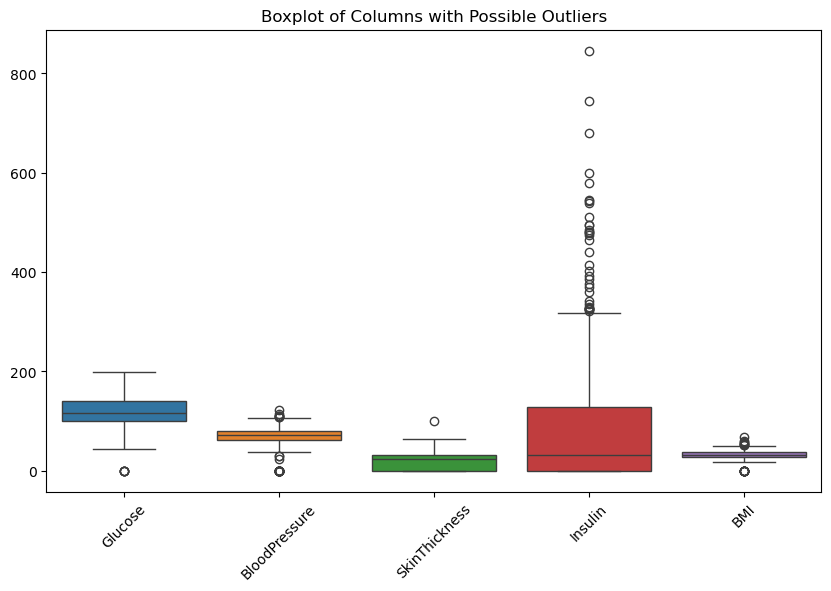

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[cols_with_invalid_zero])
plt.xticks(rotation=45)
plt.title("Boxplot of Columns with Possible Outliers")
plt.show()

#### Data Cleaning and Data Preprocessing

In [24]:
invalid_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [26]:
df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, np.nan)

In [28]:
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [30]:
for col in invalid_zero_cols:
    df[col].fillna(df[col].median(),inplace=True)

/var/folders/l7/jq3g_n713sn676yl_4_k1zl40000gn/T/ipykernel_7801/1397636895.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)


In [32]:
# Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

In [36]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [38]:
scaler = StandardScaler()

In [40]:
X_scaled = scaler.fit_transform(X)

In [42]:
y.value_counts(normalize=True) * 100

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

###  Exploratory Data Analysis

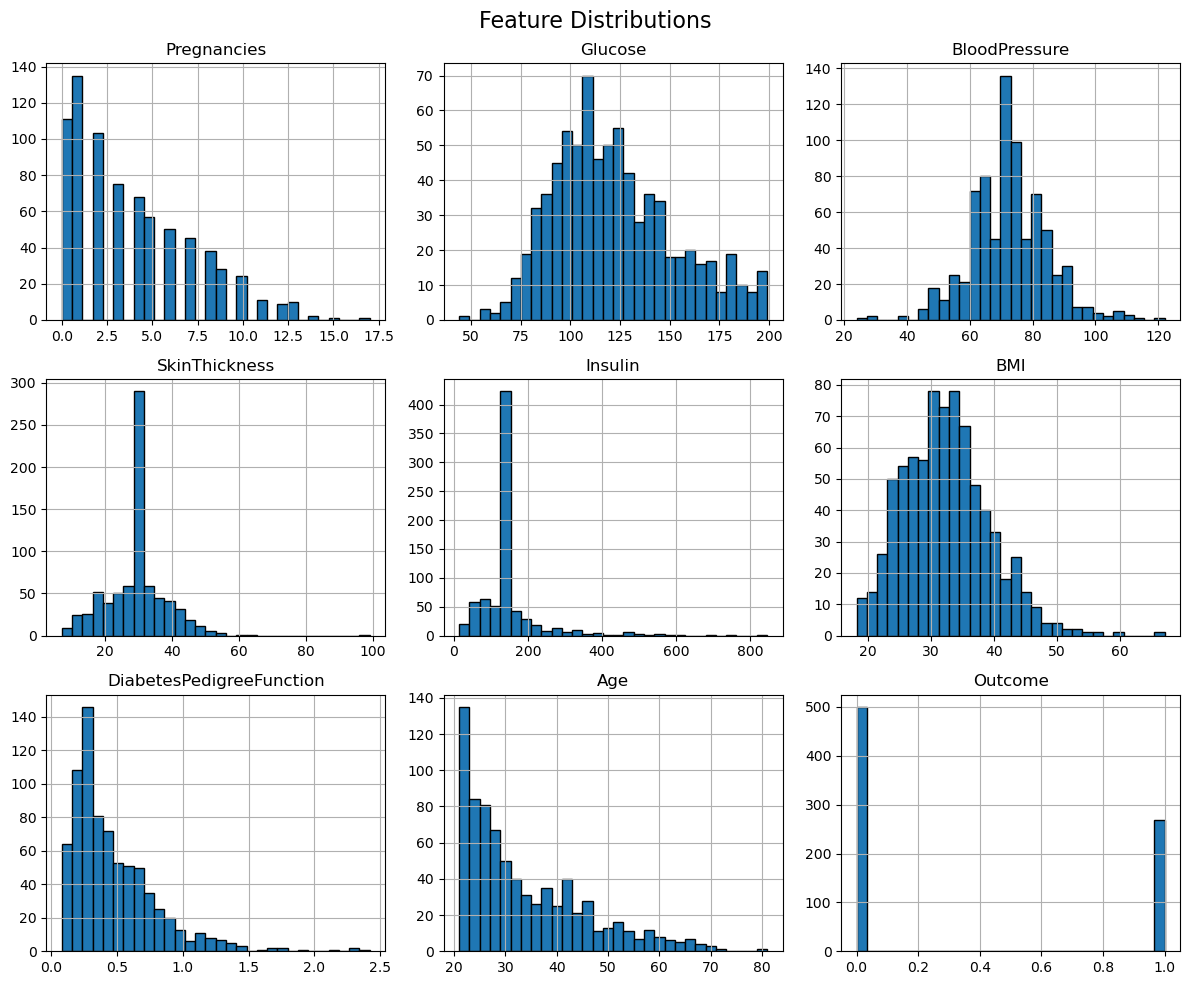

In [45]:
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

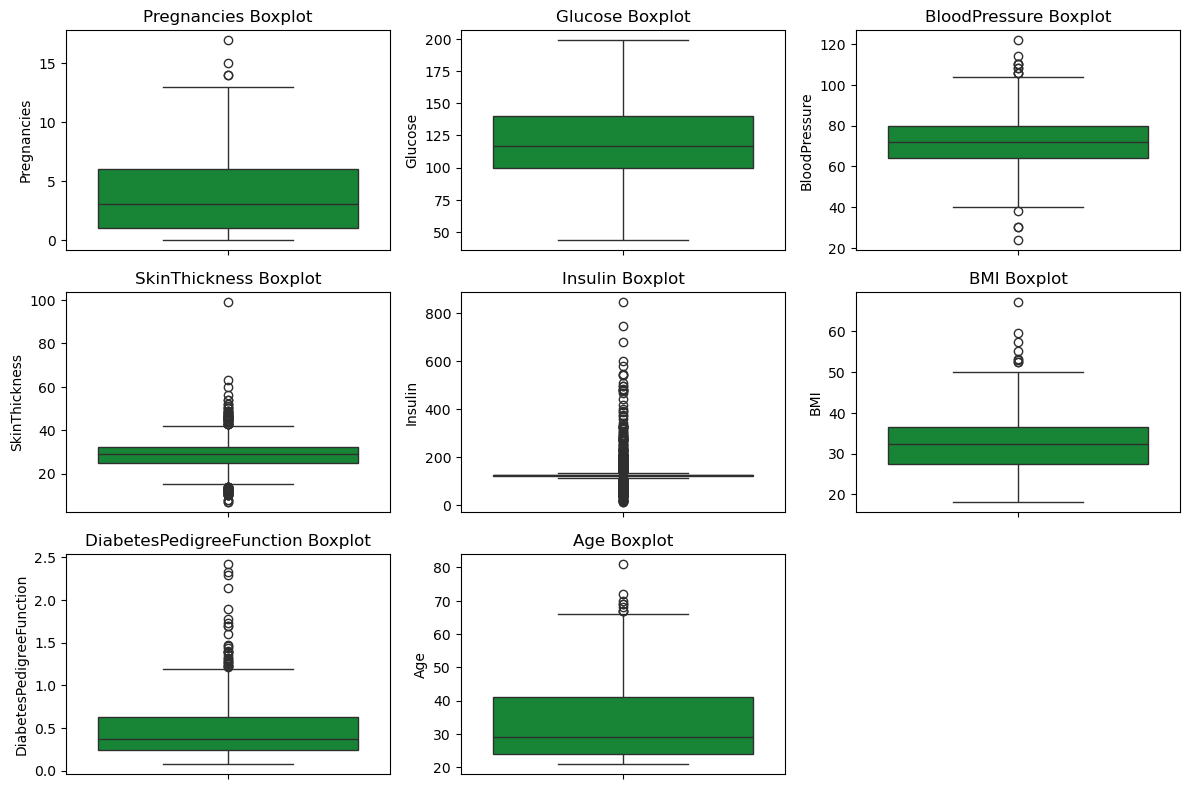

In [47]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1], 1): 
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col,color='#05962e')
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()

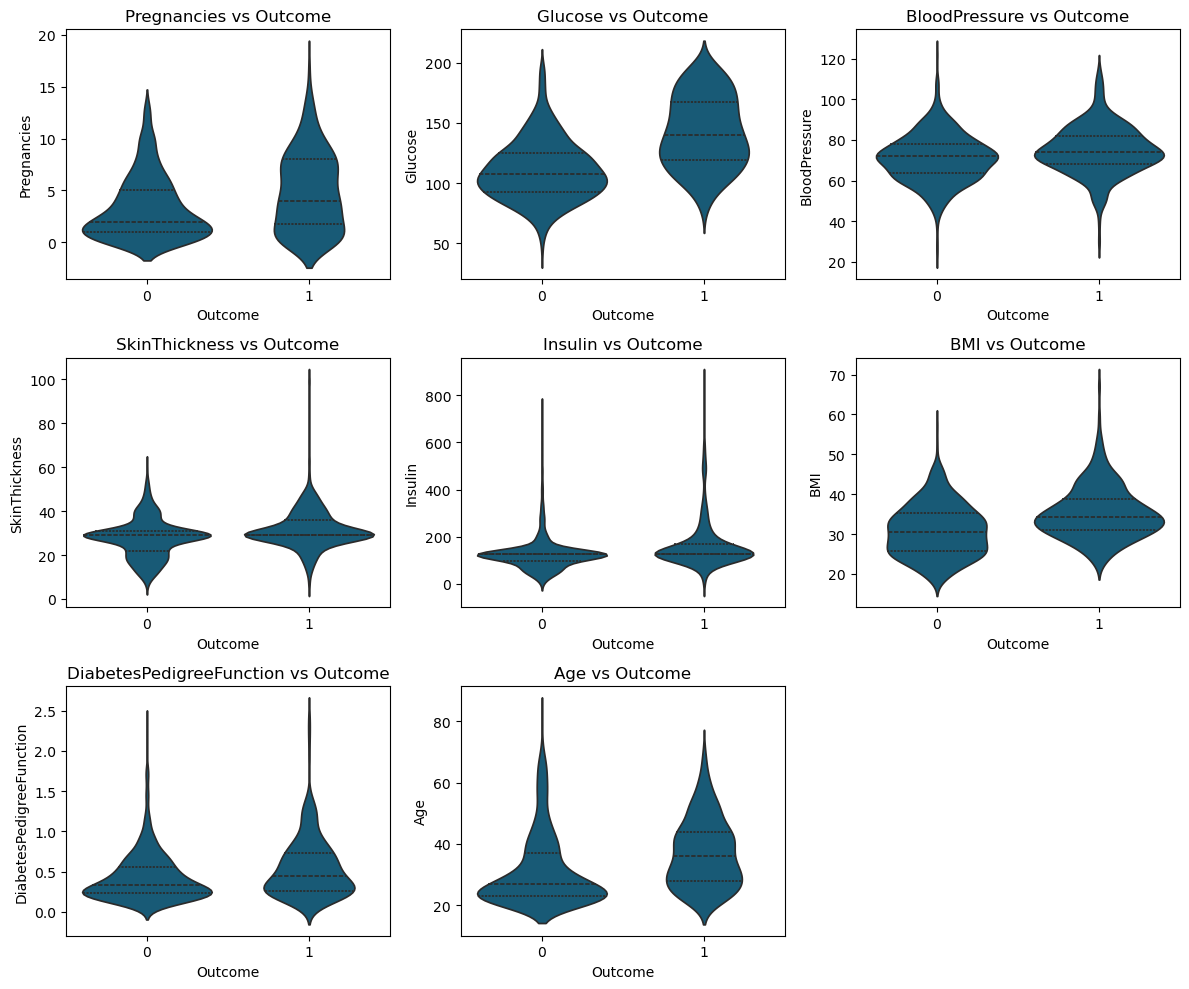

In [49]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x='Outcome', y=col, data=df, inner='quartile',color="#096085")
    plt.title(f"{col} vs Outcome")
plt.tight_layout()
plt.show()

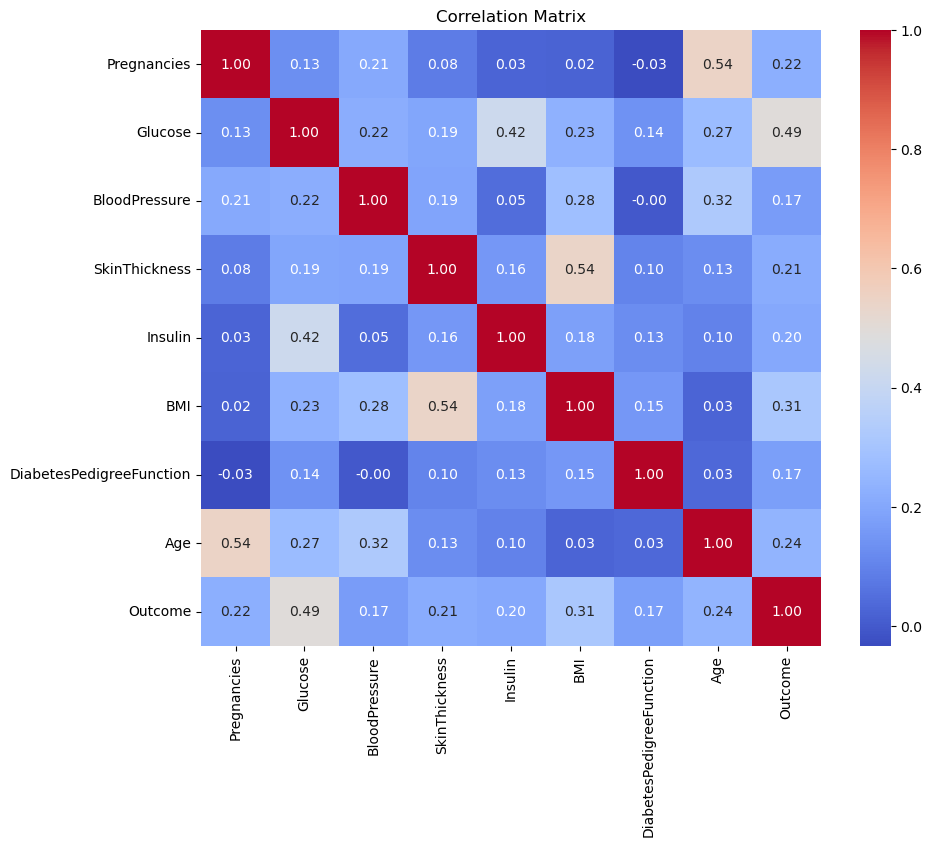

In [51]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Feature Engineering

In [54]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 100], labels=['20s', '30s', '40s', '50s', '60+'])

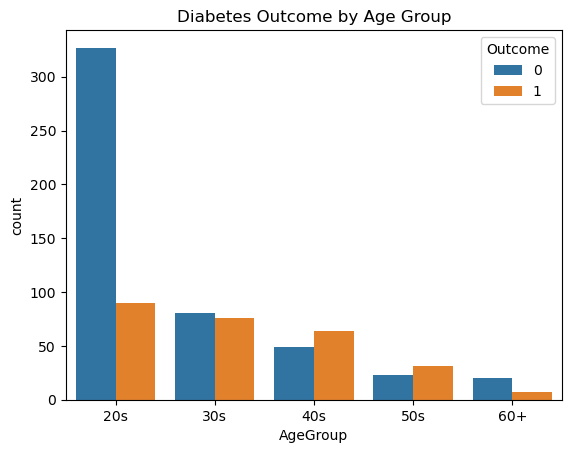

In [56]:
sns.countplot(data=df, x='AgeGroup', hue='Outcome')
plt.title('Diabetes Outcome by Age Group')
plt.show()

In [58]:
df['HighGlucose'] = (df['Glucose'] > 140).astype(int)  

In [60]:
df.drop(columns=['Age'], inplace=True)

### Data Splitting

In [63]:
from sklearn.model_selection import train_test_split

In [65]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']             # Target

In [67]:
X = pd.get_dummies(X, drop_first=True)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [71]:
print("X_train  :", X_train.shape)
print("X_test   :", X_test.shape)
print("y_train  :", y_train.value_counts(normalize=True))
print("y_test   :", y_test.value_counts(normalize=True))

X_train  : (614, 12)
X_test   : (154, 12)
y_train  : Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64
y_test   : Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


### Train Models

In [74]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [76]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [78]:
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"{model.__class__.__name__}:")
    print(f"  Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})\n")
    return scores.mean()

#### Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

In [83]:
log_reg = LogisticRegression(max_iter=1000)
evaluate_model(log_reg, X_train, y_train)

LogisticRegression:
  Accuracy: 0.7931 (+/- 0.0339)



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

0.7931094228975076

#### Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dt = DecisionTreeClassifier(random_state=42)
evaluate_model(dt, X_train, y_train)

DecisionTreeClassifier:
  Accuracy: 0.6759 (+/- 0.0179)



0.6759029721444756

#### Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf, X_train, y_train)

RandomForestClassifier:
  Accuracy: 0.7557 (+/- 0.0310)



0.755684392909503

####  K-Nearest Neighbors (KNN)

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, X_train, y_train)

KNeighborsClassifier:
  Accuracy: 0.7230 (+/- 0.0561)



0.7229774756763961

#### Support Vector Machine (SVM)

In [101]:
from sklearn.svm import SVC

In [103]:
svm = SVC(kernel='rbf', probability=True)
evaluate_model(svm, X_train, y_train)

SVC:
  Accuracy: 0.7655 (+/- 0.0248)



0.765480474476876

#### XGBoost

In [106]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [107]:
from xgboost import XGBClassifier

In [108]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
evaluate_model(xgb, X_train, y_train)

XGBClassifier:
  Accuracy: 0.7345 (+/- 0.0262)



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:35:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:35:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:35:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:35:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

0.7345061975209916

In [112]:
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt,
    "Random Forest": rf,
    "KNN": knn,
    "SVM": svm,
    "XGBoost": xgb
}

In [114]:
results = {}
for name, model in models.items():
    score = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy').mean()
    results[name] = round(score, 4)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [115]:
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

In [118]:
pd.DataFrame(results_df.sort_values(by="Accuracy", ascending=False))

,Model,Accuracy
0,Logistic Regression,0.7931
4,SVM,0.7655
2,Random Forest,0.7557
5,XGBoost,0.7345
3,KNN,0.7230
1,Decision Tree,0.6759


####  Model Evaluation

In [121]:
from sklearn.metrics import confusion_matrix, classification_report,roc_curve, roc_auc_score, ConfusionMatrixDisplay

In [123]:
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [125]:
y_pred = best_model.predict(X_test)

In [127]:
y_proba = best_model.predict_proba(X_test)[:, 1] 

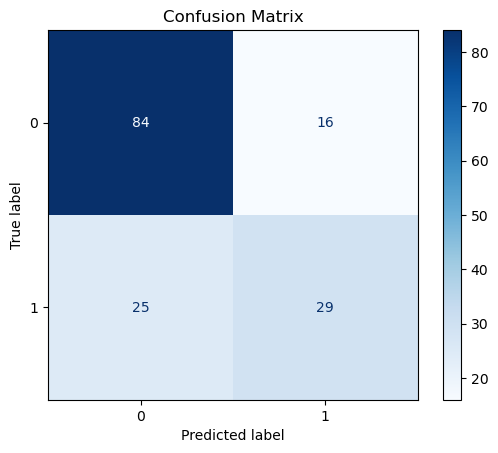

In [129]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [131]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.77      0.84      0.80       100
    Diabetes       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154



In [133]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

In [135]:
auc_score = roc_auc_score(y_test, y_proba)

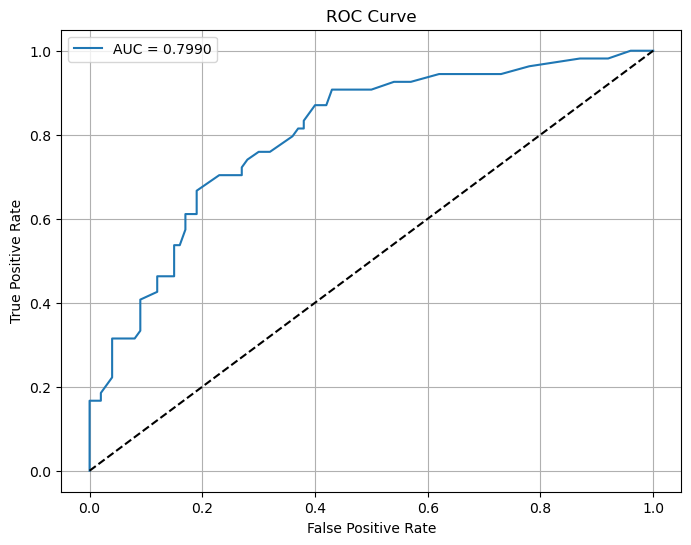

In [137]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [139]:
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.7990


#### Hyperparameter Tuning

In [142]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [144]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [146]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [148]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [149]:
print("Best Parameters  :", grid_search.best_params_)
print("Best Accuracy    :", grid_search.best_score_)

Best Parameters  : {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy    : 0.7785419165667067


In [152]:
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=20,  # Try 20 random combinations
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

In [154]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy', verbose=1)

In [156]:
print("Best Parameters  :", random_search.best_params_)
print("Best Accuracy    :", random_search.best_score_)

Best Parameters  : {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}
Best Accuracy    : 0.7753298680527789


In [158]:
best_model = grid_search.best_estimator_ 

In [160]:
y_pred = best_model.predict(X_test)

In [162]:
print("Classification Report (Tuned Model):")
print(classification_report(y_test, y_pred))

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.64      0.52      0.57        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



#### Feature Importance

In [165]:
importances = best_model.feature_importances_

In [167]:
feature_names = X_train.columns

In [169]:
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

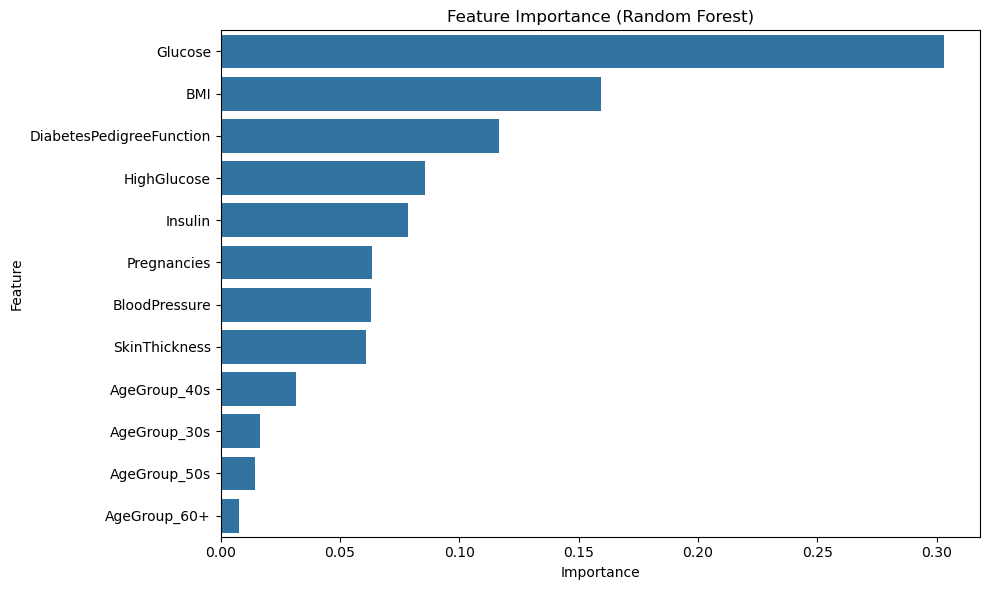

In [171]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

#### Final Testing

In [174]:
y_pred = best_model.predict(X_test)

In [176]:
y_proba = best_model.predict_proba(X_test)[:, 1]

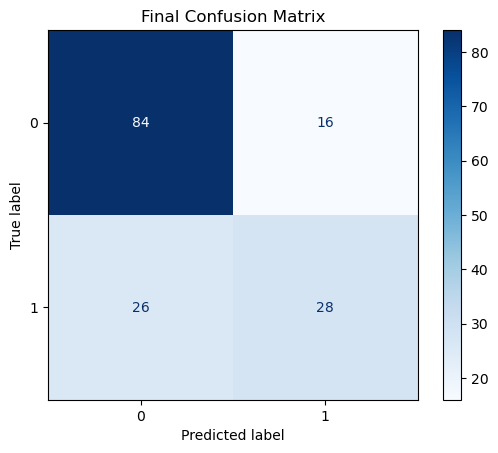

In [178]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Final Confusion Matrix")
plt.show()

In [180]:
final_auc = roc_auc_score(y_test, y_proba)
print(f"Final AUC Score: {final_auc:.4f}")

Final AUC Score: 0.8031
